## Python dependencies

In [133]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data loading & cleaning 

In [134]:
df_1 = pd.read_csv("raw_data/connectivity1458292421ttyUSB0.csv",
                  names=["type", "MAC", "seq", "wraps", "timestamp", "RSSI", "LQI"],)
df_2 = pd.read_csv("raw_data/connectivity1459473036ttyUSB0.csv",
                  names=["type", "MAC", "seq", "wraps", "timestamp", "RSSI", "LQI"],)

# We apply the same cleaning on all data sets
for num, d in enumerate([df_1, df_2]):
    d["type"] = d["type"].map({"0xaa": "rPi", "0x55": "mote"})
    # It's better to have a Not a Number (NaN) rather than 0 to avoid confusion.
    d["timestamp"] = d["timestamp"].replace({0: np.nan})
    # Timestamp are only delta. No date sync is available.
    d['timestamp'] = d["timestamp"] - d["timestamp"].min()
    d["origin"] = num

df = pd.concat([df_1, df_2])

## Motes in action

We can see all the motes in actions:

In [135]:
df_1[df_1["type"] == "mote"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1'], dtype=object)

In [136]:
df_2[df_2["type"] == "mote"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x84:0x64'], dtype=object)

## RaspberryPi in action

In [137]:
df_1[df_1["type"] == "rPi"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a',
       '0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43'], dtype=object)

In [138]:
df_2[df_2["type"] == "rPi"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a',
       '0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43'], dtype=object)

## RSSI summary

In [139]:
df.RSSI.describe()

count    343002.000000
mean        -34.238876
std           3.266245
min         -61.000000
25%         -37.000000
50%         -33.000000
75%         -31.000000
max         -28.000000
Name: RSSI, dtype: float64

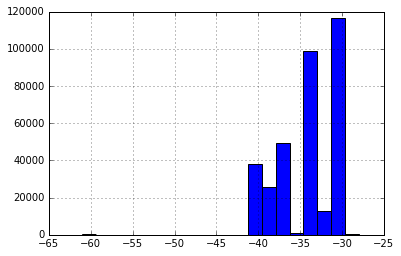

In [140]:
df.RSSI.hist(bins=20)

## LQI summary

In [141]:
df.LQI.describe()

count    343002.000000
mean        107.926432
std           0.330771
min          66.000000
25%         108.000000
50%         108.000000
75%         108.000000
max         108.000000
Name: LQI, dtype: float64

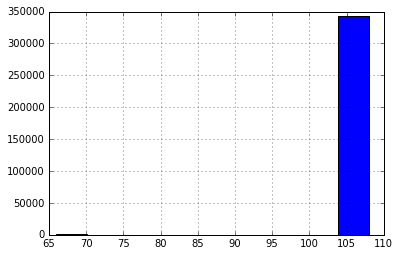

In [142]:
df.LQI.hist()

## How many time a packet with a given (MAC, seq) number is seen?

In [143]:
df.groupby(["MAC", "seq"], sort=True).size().unique()

array([1, 2, 3, 4])

Some packets seems to show up 1, 2, 3 or 4 times.

In [174]:
t = df.groupby(["MAC", "seq"], sort=True).size()

In [175]:
t[t == 3].count()

4

4 couples (MAC, sqe) shows up 3 times

In [173]:
t[t == 3]

MAC                                   seq  
0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1  9766     3
                                      10280    3
0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a   10537    3
0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43   11051    3
dtype: int64

Let's see how many (mac, seq) shows up 4 time:

In [170]:
t[t == 4].count()

443

### Example of a (MAC, seq) showing up 4 time

In [165]:
df[(df.MAC == "0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1") & (df.seq == 10023)]

,type,MAC,seq,wraps,timestamp,RSSI,LQI,origin
266,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,10023,0,88.0,-39,108,0
1031,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,10023,0,343.0,-39,108,0
30885,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,10023,0,10499.0,-31,108,0
31650,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,10023,0,10753.0,-31,108,0


In [179]:
df.seq.describe()

count    343002.000000
mean      34006.547985
std       17222.756275
min           0.000000
25%       19918.000000
50%       34210.000000
75%       48502.750000
max       65278.000000
Name: seq, dtype: float64

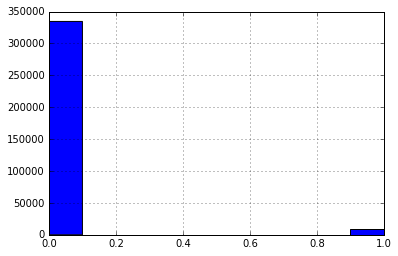

In [180]:
df.wraps.hist()